In [1]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
from nltk.corpus import stopwords
import sklearn
from tensorflow.keras.layers import TextVectorization




## Multilingual model

In [2]:
multilingual_ds = pd.read_csv('mult_ds_preprocessed.csv')
multilingual_ds.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,426417035bd5b20c,пропонований злиття неформалізм стаття існуват...,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4264fd1c363935d3,колір фон заповнення колір фон світлосірий вер...,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4265fd7c2447bc08,жила скеля половина австралійський англійський...,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4266b67c57e3cfbb,японський назва місто переглянути пост вікіпед...,0.0,0.0,0.0,0.0,0.0,0.0
4,4,426a0fd1b3460373,небажання обговорювати будьякий змінити свідчи...,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
multilingual_ds.dropna()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,426417035bd5b20c,пропонований злиття неформалізм стаття існуват...,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4264fd1c363935d3,колір фон заповнення колір фон світлосірий вер...,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4265fd7c2447bc08,жила скеля половина австралійський англійський...,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4266b67c57e3cfbb,японський назва місто переглянути пост вікіпед...,0.0,0.0,0.0,0.0,0.0,0.0
4,4,426a0fd1b3460373,небажання обговорювати будьякий змінити свідчи...,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
43087,21983,3effe88a05807326,это объясняться страница обсуждение нервный ан...,1.0,0.0,0.0,0.0,0.0,0.0
43088,21984,3f004f1df3b0eb0e,предложение совместный работа статья привет со...,0.0,0.0,0.0,0.0,0.0,0.0
43089,21985,3f0065f71fac4bb8,это уля глостершир хотя одноимённый гастропаб ...,0.0,0.0,0.0,0.0,0.0,0.0
43090,21986,3f006abae2ee3011,спасибо тёплый приём гомосексуальный гей фрукт...,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Splitting the dataset into comments and features

X = multilingual_ds['comment_text']
y = multilingual_ds[multilingual_ds.columns[3:]].values
X = X.astype('str')

In [5]:
multilingual_ds.shape

(43092, 9)

In [6]:
y

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [7]:
MAX_FEATURES = 40_000

In [8]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES,
                               output_sequence_length = 1800,
                               output_mode = 'int')

In [9]:
#A preprocessing layer which maps text features to integer sequences.
vectorizer.adapt(X.values)

In [10]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'это',
 'который',
 'статья',
 'сторінка',
 'страница',
 'стаття',
 'мочь',
 'ваш',
 'вікіпедія',
 'википедия',
 'должный',
 'являться',
 'свой',
 'стать',
 'правка',
 'ласка',
 'сделать',
 'человек',
 'зробити',
 'пожалуйста',
 'обсуждение',
 'иметь',
 'просто',
 'обговорення',
 'редактор',
 'спасибо',
 'знати',
 'время',
 'повинний',
 'джерело',
 'источник',
 'хотеть',
 'знать',
 'проблема',
 'право',
 'год',
 'посилання',
 'думати',
 'ссылка',
 'думать',
 'также',
 'хороший',
 'использовать',
 'говорить',
 'користувач',
 'робити',
 'список',
 'делать',
 'вопрос',
 'видалення',
 'редагування',
 'слово',
 'удалить',
 'удаление',
 'інформація',
 'информация',
 'сказать',
 'почему',
 'пользователь',
 'факт',
 'правило',
 'некоторый',
 'використовувати',
 'любой',
 'тема',
 'видалити',
 'причина',
 'дело',
 'зображення',
 'изображение',
 'поэтому',
 'добавить',
 'очень',
 'видеть',
 'день',
 'вважати',
 'можливо',
 'бачити',
 'несколько',
 'комментарий',
 'раздел',
 'розм

In [11]:
#Converting to a sequence of integers
vectorized_text = vectorizer(X.values)

In [28]:
#MCSHBAP - map, cache, shuffle, batch, prefetch
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(40_000)
dataset = dataset.batch(10)
dataset = dataset.prefetch(8) #help prevents bottlenecks

In [29]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [30]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
import scipy.stats
from sklearn.metrics import accuracy_score

confidence = 0.95  # Change to your desired confidence level
z_value = scipy.stats.norm.ppf((1 + confidence) / 2.0)
print(z_value)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

1.959963984540054


In [4]:
# y = np.column_stack((multilingual_ds["toxic"], multilingual_ds["severe_toxic"], multilingual_ds["obscene"],
#                      multilingual_ds["identity_hate"]  ))

In [5]:
# X = multilingual_ds['comment_text']

In [7]:
# indices = np.arange(X.shape[0])
# np.random.shuffle(indices)
# X = X[indices]
# y = y[indices]

In [71]:
# from sklearn.model_selection import train_test_split

# #Split the data into train and tests sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

# #Split the test set into validation and test sets

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)

# # print the shapes of the resulting datasets
# print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
# print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
# print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (22623,), y_train shape: (22623, 4)
X_val shape: (7541,), y_val shape: (7541, 4)
X_test shape: (12928,), y_test shape: (12928, 4)


In [16]:
# X_train = X_train.astype(str)
# X_val = X_val.astype(str)
# X_test = X_test.astype(str)



In [16]:
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
# from keras_preprocessing.sequence import pad_sequences

In [47]:
# #Create a tokenizer and fit it on the training data

# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_train)

# # Convert the texts to sequences of tokens
# X_train_seq = tokenizer.texts_to_sequences(X_train)
# X_val_seq = tokenizer.texts_to_sequences(X_val)
# X_test_seq = tokenizer.texts_to_sequences(X_test)

# # Pad the sequences to a fixed length
# max_len =1800  # Example value
# X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
# X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
# X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [17]:
mult_model = Sequential()
#Create an embedding layer
mult_model.add(Embedding(MAX_FEATURES+1, 32))
#Create a LSTM layer
mult_model.add(Bidirectional(LSTM(32, activation = 'tanh')))
#Features extractors fully-connected layers
mult_model.add(Dense(128, activation ='relu'))
mult_model.add(Dense(256, activation = 'relu'))
mult_model.add(Dense(128, activation = 'relu'))
#Final layer
mult_model.add(Dense(6, activation = 'sigmoid'))

In [18]:
mult_model.compile(loss='BinaryCrossentropy', optimizer = 'Adam',
                   metrics = ['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [19]:
mult_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          1280032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [20]:
history = mult_model.fit(train, epochs=2,
                                    validation_data= val)

Epoch 1/2
3017/3017 [==============================] - 2441s 808ms/step - loss: 0.0923 - accuracy: 0.9805 - precision: 0.7371 - recall: 0.3563 - val_loss: 0.0597 - val_accuracy: 0.9947 - val_precision: 0.8619 - val_recall: 0.5307
Epoch 2/2
3017/3017 [==============================] - 2566s 850ms/step - loss: 0.0576 - accuracy: 0.9665 - precision: 0.7920 - recall: 0.5970 - val_loss: 0.0491 - val_accuracy: 0.6727 - val_precision: 0.8803 - val_recall: 0.5742


In [27]:
print(type(test))

<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>


In [32]:
loss, accuracy, precision, recall = mult_model(test, verbose=0)

TypeError: Inputs to a layer should be tensors. Got: <TakeDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None, 6), dtype=tf.float64, name=None))>

<Figure size 800x500 with 0 Axes>

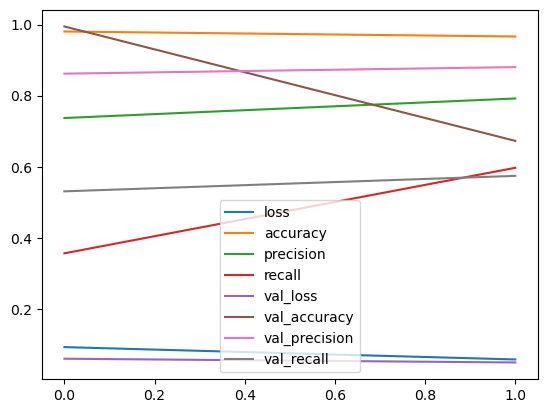

In [33]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [34]:
loss, acc = mult_model.evaluate(test, verbose = 0)

ValueError: too many values to unpack (expected 2)

In [111]:
print('Test accuracy %f' % (acc * 100))

Test accuracy 99.488610


In [35]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [36]:
pre = Precision()
re = Recall()


In [37]:
for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true, y_true = batch
    #Make prediction
    yhat = mult_model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)

1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 116ms/step


In [38]:
f1_score = 2*(pre.result().numpy() * re.result().numpy())/(pre.result().numpy() + re.result().numpy())
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, F1-score:{f1_score}')

Precision: 0.8998358249664307, Recall:0.5463609099388123, F1-score:0.67990071036101


In [39]:
from sklearn.metrics import accuracy_score
ci_length = z_value * np.sqrt((acc * (1 - acc)) / y.shape[0])
ci_lower = acc - ci_length
ci_upper = acc + ci_length
print("Lower bound: ", ci_lower, "Upper bound: ", ci_upper)
print()
print("So, the above values represent the 95% confidence interval around the test set accuracy")

NameError: name 'acc' is not defined

# Russian model below

In [118]:
rus_ds = pd.read_csv('rus_ds_preprocessed.csv')
rus_ds.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0000997932d777bf,объяснениепочий отменить правка сделать имя по...,0.0,0.0,0.0,0.0,0.0,0.0
1,1,000103f0d9cfb60f,дау соответствовать цвет фон который казаться ...,0.0,0.0,0.0,0.0,0.0,0.0
2,2,000113f07ec002fd,эй чувак действительно пытаться редактировать ...,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0001b41b1c6bb37e,мочь сделать никакой реальный предложение улуч...,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0001d958c54c6e35,сэр герой шанс помнить страница это находиться,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
#Splitting the dataset into comments and features

X = rus_ds['comment_text']
y = rus_ds[rus_ds.columns[3:]].values
X = X.astype('str')

In [121]:
X.shape

(21346,)

In [122]:
MAX_FEATURES = 21_346
vectorizer = TextVectorization(max_tokens = MAX_FEATURES,
                               output_sequence_length = 1800,
                               output_mode = 'int')

#A preprocessing layer which maps text features to integer sequences.
vectorizer.adapt(X.values)
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'это',
 'который',
 'статья',
 'страница',
 'мочь',
 'ваш',
 'википедия',
 'должный',
 'являться',
 'свой',
 'сделать',
 'человек',
 'пожалуйста',
 'обсуждение',
 'иметь',
 'просто',
 'спасибо',
 'время',
 'источник',
 'хотеть',
 'знать',
 'год',
 'ссылка',
 'думать',
 'также',
 'использовать',
 'говорить',
 'правка',
 'делать',
 'вопрос',
 'удалить',
 'удаление',
 'информация',
 'сказать',
 'почему',
 'пользователь',
 'некоторый',
 'любой',
 'дело',
 'хороший',
 'изображение',
 'поэтому',
 'добавить',
 'очень',
 'видеть',
 'редактор',
 'несколько',
 'комментарий',
 'раздел',
 'проблема',
 'имя',
 'случай',
 'право',
 'редактирование',
 'стать',
 'использование',
 'найти',
 'действительно',
 'часть',
 'возможно',
 'привет',
 'считать',
 'первый',
 'написать',
 'вклад',
 'новый',
 'заблокировать',
 'работа',
 'кроме',
 'причина',
 'история',
 'получить',
 'поскольку',
 'список',
 'день',
 'редактировать',
 'слово',
 'никакой',
 'казаться',
 'название',
 'место',
 'хотя',

In [123]:
#Converting to a sequence of integers
vectorized_text = vectorizer(X.values)

In [160]:
#MCSHBAP - map, cache, shuffle, batch, prefetch
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(21_000)
dataset = dataset.batch(16) #previously 8
dataset = dataset.prefetch(10) #help prevents bottlenecks previously 8

In [161]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [162]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
import scipy.stats
from sklearn.metrics import accuracy_score

confidence = 0.95  # Change to your desired confidence level
z_value = scipy.stats.norm.ppf((1 + confidence) / 2.0)
print(z_value)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

1.959963984540054


In [20]:
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [165]:
rus_model = Sequential()
#Create an embedding layer
rus_model.add(Embedding(MAX_FEATURES+1, 32))
#Create a LSTM layer
rus_model.add(Bidirectional(LSTM(32, activation = 'tanh')))
#Features extractors fully-connected layers
rus_model.add(Dense(128, activation ='relu'))
rus_model.add(Dense(256, activation = 'relu'))
rus_model.add(Dense(128, activation = 'relu'))
#Final layer
rus_model.add(Dense(6, activation = 'sigmoid'))

In [166]:
rus_model.compile(loss='BinaryCrossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [144]:
rus_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 32)          683104    
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_36 (Dense)            (None, 128)               8320      
                                                                 
 dense_37 (Dense)            (None, 256)               33024     
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                                 
 dense_39 (Dense)            (None, 6)                 774       
                                                     

In [142]:
with tf.device('/CPU:0'):
    history = rus_model.fit(train, epochs=5,
                                    validation_data= val)

Epoch 1/5
1868/1868 [==============================] - 1619s 867ms/step - loss: 0.0926 - accuracy: 0.9570 - val_loss: 0.0640 - val_accuracy: 0.3773
Epoch 2/5
1868/1868 [==============================] - 1588s 850ms/step - loss: 0.0619 - accuracy: 0.9374 - val_loss: 0.0529 - val_accuracy: 0.9932
Epoch 3/5
1868/1868 [==============================] - 1547s 828ms/step - loss: 0.0536 - accuracy: 0.9479 - val_loss: 0.0496 - val_accuracy: 0.9927
Epoch 4/5
1868/1868 [==============================] - 1561s 835ms/step - loss: 0.0477 - accuracy: 0.8152 - val_loss: 0.0469 - val_accuracy: 0.9925
Epoch 5/5
1868/1868 [==============================] - 1531s 820ms/step - loss: 0.0431 - accuracy: 0.9270 - val_loss: 0.0364 - val_accuracy: 0.9934


In [153]:
loss, acc = rus_model.evaluate(test, verbose = 0)

In [154]:
print('Test accuracy %f' % (acc * 100))

Test accuracy 99.483085


In [18]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [149]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy

In [157]:
for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true, y_true = batch
    #Make prediction
    yhat = rus_model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)

1/1 [==============================] - 0s 133ms/step


In [158]:
f1_score = 2*(pre.result().numpy() * re.result().numpy())/(pre.result().numpy() + re.result().numpy())
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, F1-score:{f1_score}')

Precision: 0.6995614171028137, Recall:0.34863388538360596, F1-score:0.4653537513220894


In [159]:
from sklearn.metrics import accuracy_score
ci_length = z_value * np.sqrt((acc * (1 - acc)) / y.shape[0])
ci_lower = acc - ci_length
ci_upper = acc + ci_length
print("Lower bound: ", ci_lower, "Upper bound: ", ci_upper)
print()
print("So, the above values represent the 95% confidence interval around the test set accuracy")

Lower bound:  0.9938688488014406 Upper bound:  0.9957928447715575

So, the above values represent the 95% confidence interval around the test set accuracy


In [167]:
with tf.device('/CPU:0'): #batch 10
    history = rus_model.fit(train, epochs=6,
                                    validation_data= val)

Epoch 1/6
934/934 [==============================] - 850s 906ms/step - loss: 0.1075 - accuracy: 0.9204 - val_loss: 0.0670 - val_accuracy: 0.9934
Epoch 2/6
934/934 [==============================] - 901s 965ms/step - loss: 0.0625 - accuracy: 0.9696 - val_loss: 0.0492 - val_accuracy: 0.9941
Epoch 3/6
934/934 [==============================] - 800s 856ms/step - loss: 0.0532 - accuracy: 0.9329 - val_loss: 0.0440 - val_accuracy: 0.6348
Epoch 4/6
934/934 [==============================] - 815s 873ms/step - loss: 0.0471 - accuracy: 0.9593 - val_loss: 0.0387 - val_accuracy: 0.9946
Epoch 5/6
934/934 [==============================] - 796s 852ms/step - loss: 0.0416 - accuracy: 0.8915 - val_loss: 0.0355 - val_accuracy: 0.2823
Epoch 6/6
934/934 [==============================] - 817s 874ms/step - loss: 0.0385 - accuracy: 0.9415 - val_loss: 0.0346 - val_accuracy: 0.9932


<Figure size 576x360 with 0 Axes>

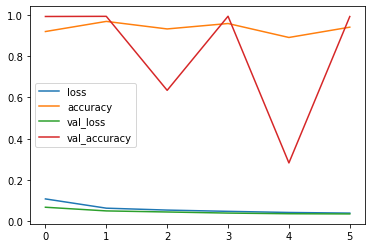

In [168]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [176]:
loss, acc = rus_model.evaluate(test, verbose = 0)

In [177]:
print('Test accuracy %f' % (acc * 100))

Test accuracy 99.577069


In [171]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
re = Recall()

for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true, y_true = batch
    #Make prediction
    yhat = rus_model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)


1/1 [==============================] - 0s 165ms/step


In [172]:
f1_score = 2*(pre.result().numpy() * re.result().numpy())/(pre.result().numpy() + re.result().numpy())
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, F1-score:{f1_score}')

Precision: 0.9027431607246399, Recall:0.7479338645935059, F1-score:0.8180791170171018


In [178]:
from sklearn.metrics import accuracy_score
ci_length = z_value * np.sqrt((acc * (1 - acc)) / y.shape[0])
ci_lower = acc - ci_length
ci_upper = acc + ci_length
print("Lower bound: ", ci_lower, "Upper bound: ", ci_upper)
print()
print("So, the above values represent the 95% confidence interval around the test set accuracy")

Lower bound:  0.9949001219716141 Upper bound:  0.9966412636790206

So, the above values represent the 95% confidence interval around the test set accuracy


## Multilingual LSTM model, epochs = 10 and epochs = 9

In [3]:
multilingual_ds = pd.read_csv('mult_ds_preprocessed.csv')
multilingual_ds.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,426417035bd5b20c,пропонований злиття неформалізм стаття існуват...,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4264fd1c363935d3,колір фон заповнення колір фон світлосірий вер...,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4265fd7c2447bc08,жила скеля половина австралійський англійський...,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4266b67c57e3cfbb,японський назва місто переглянути пост вікіпед...,0.0,0.0,0.0,0.0,0.0,0.0
4,4,426a0fd1b3460373,небажання обговорювати будьякий змінити свідчи...,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Splitting the dataset into comments and features

X = multilingual_ds['comment_text']
y = multilingual_ds[multilingual_ds.columns[3:]].values
X = X.astype('str')

In [5]:
MAX_FEATURES = 40_000

In [6]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES,
                               output_sequence_length = 1800,
                               output_mode = 'int')

In [7]:
#A preprocessing layer which maps text features to integer sequences.
vectorizer.adapt(X.values)

In [8]:
#Converting to a sequence of integers
vectorized_text = vectorizer(X.values)

In [9]:
#MCSHBAP - map, cache, shuffle, batch, prefetch
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(40_000)
dataset = dataset.batch(16) #previously 
dataset = dataset.prefetch(10) #help prevents bottlenecks 

In [10]:
len(dataset)

2694

In [11]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [12]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.1))
test = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.2))

In [16]:
mult_model = Sequential()
#Create an embedding layer
mult_model.add(Embedding(MAX_FEATURES+1, 32))
#Create a LSTM layer
mult_model.add(Bidirectional(LSTM(32, activation = 'tanh')))
#Features extractors fully-connected layers
mult_model.add(Dense(128, activation ='relu'))
mult_model.add(Dense(256, activation = 'relu'))
mult_model.add(Dense(128, activation = 'relu'))
#Final layer
mult_model.add(Dense(6, activation = 'sigmoid'))

In [21]:
mult_model.compile(loss='BinaryCrossentropy', optimizer = 'Adam',
                   metrics = ['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [22]:
mult_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          1280032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [23]:
with tf.device('/CPU:0'):
    history = mult_model.fit(train, epochs=9,
                                    validation_data= val)

Epoch 1/9
1885/1885 [==============================] - 1609s 852ms/step - loss: 0.0948 - accuracy: 0.9773 - precision: 0.7609 - recall: 0.3546 - val_loss: 0.0591 - val_accuracy: 0.9928 - val_precision: 0.8321 - val_recall: 0.5820
Epoch 2/9
1885/1885 [==============================] - 1573s 834ms/step - loss: 0.0591 - accuracy: 0.9914 - precision: 0.8024 - recall: 0.5789 - val_loss: 0.0510 - val_accuracy: 0.4907 - val_precision: 0.8149 - val_recall: 0.7027
Epoch 3/9
1885/1885 [==============================] - 1529s 811ms/step - loss: 0.0494 - accuracy: 0.9506 - precision: 0.8200 - recall: 0.6489 - val_loss: 0.0441 - val_accuracy: 0.9947 - val_precision: 0.8232 - val_recall: 0.7033
Epoch 4/9
1885/1885 [==============================] - 1547s 821ms/step - loss: 0.0445 - accuracy: 0.9533 - precision: 0.8349 - recall: 0.6912 - val_loss: 0.0380 - val_accuracy: 0.9951 - val_precision: 0.8208 - val_recall: 0.7608
Epoch 5/9
1885/1885 [==============================] - 1529s 811ms/step - loss: 

In [26]:
acc = mult_model.evaluate(test, verbose=0)

In [32]:
print(acc[1])

0.9878020286560059


<Figure size 576x360 with 0 Axes>

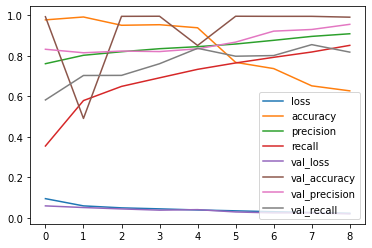

In [29]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [30]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
re = Recall()

for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true, y_true = batch
    #Make prediction
    yhat = mult_model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)

1/1 [==============================] - 0s 114ms/step


In [31]:
f1_score = 2*(pre.result().numpy() * re.result().numpy())/(pre.result().numpy() + re.result().numpy())
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, F1-score:{f1_score}')

Precision: 0.9567504525184631, Recall:0.8226130604743958, F1-score:0.884625766336024


In [34]:

from sklearn.metrics import accuracy_score
ci_length = z_value * np.sqrt((acc[1] * (1 - acc[1])) / y.shape[0])
ci_lower = acc[1] - ci_length
ci_upper = acc[1] + ci_length
print("Lower bound: ", ci_lower, "Upper bound: ", ci_upper)
print()
print("So, the above values represent the 95% confidence interval around the test set accuracy")

Lower bound:  0.9867656259775814 Upper bound:  0.9888384313344303

So, the above values represent the 95% confidence interval around the test set accuracy


Based on the provided metrics, the model has a precision of 0.956, which indicates that when the model predicts a positive instance, it is correct 95.6% of the time. The recall is 0.823, which indicates that the model correctly identifies 82.3% of the actual positive instances. The F1-score is 0.885, which is a harmonic mean of precision and recall, and takes into account both measures.

Lastly, the accuracy is estimated to be between 0.987 and 0.989, based on the provided lower and upper bounds. It is important to note that accuracy is only a relevant metric if the dataset is balanced.

Overall, the model seems to have good performance, with high precision, recall, and F1-score, and a high estimated accuracy.

In [244]:
with tf.device('/CPU:0'):
    history = mult_model.fit(train, epochs=10,
                                    validation_data= val)

Epoch 1/10
1885/1885 [==============================] - 1642s 868ms/step - loss: 0.0953 - accuracy: 0.9725 - precision_4: 0.7395 - recall_4: 0.3485 - val_loss: 0.0566 - val_accuracy: 0.9947 - val_precision_4: 0.8548 - val_recall_4: 0.5470
Epoch 2/10
1885/1885 [==============================] - 1663s 882ms/step - loss: 0.0593 - accuracy: 0.9862 - precision_4: 0.7951 - recall_4: 0.5850 - val_loss: 0.0535 - val_accuracy: 0.9951 - val_precision_4: 0.8062 - val_recall_4: 0.6473
Epoch 3/10
1885/1885 [==============================] - 1640s 870ms/step - loss: 0.0521 - accuracy: 0.9866 - precision_4: 0.8191 - recall_4: 0.6494 - val_loss: 0.0403 - val_accuracy: 0.8943 - val_precision_4: 0.8666 - val_recall_4: 0.6927
Epoch 4/10
1885/1885 [==============================] - 1586s 841ms/step - loss: 0.0442 - accuracy: 0.9573 - precision_4: 0.8260 - recall_4: 0.6941 - val_loss: 0.0433 - val_accuracy: 0.9944 - val_precision_4: 0.8132 - val_recall_4: 0.7582
Epoch 5/10
1885/1885 [======================

In [245]:
loss, acc, recall, precision = mult_model.evaluate(test, verbose=0)
print('Test Accuracy: %f' % (acc*100))
print('Test Loss: %f' % (loss*100))
print('Test Recall: %f' % (recall*100))
print('Test Precision: %f' % (precision*100))



Test Accuracy: 33.178440
Test Loss: 2.420569
Test Recall: 88.442755
Test Precision: 85.385019


In [259]:
acc = mult_model.evaluate(test, verbose=0)

In [260]:
avg_acc = sum(acc)/len(acc)

In [261]:
print('Test Accuracy: %f' % (avg_acc*100))

Test Accuracy: 52.371788


<Figure size 576x360 with 0 Axes>

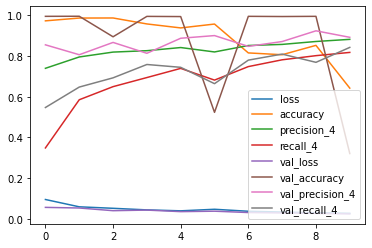

In [248]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [250]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
re = Recall()

for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true, y_true = batch
    #Make prediction
    yhat = mult_model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)

1/1 [==============================] - 0s 137ms/step


In [251]:
f1_score = 2*(pre.result().numpy() * re.result().numpy())/(pre.result().numpy() + re.result().numpy())
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, F1-score:{f1_score}')

Precision: 0.8982768058776855, Recall:0.8674181699752808, F1-score:0.8825778067818308


In [262]:
from sklearn.metrics import accuracy_score
ci_length = z_value * np.sqrt((avg_acc * (1 - avg_acc)) / y.shape[0])
ci_lower = acc - ci_length
ci_upper = acc + ci_length
print("Lower bound: ", ci_lower, "Upper bound: ", ci_upper)
print()
print("So, the above values represent the 95% confidence interval around the test set accuracy")

Lower bound:  [0.02031854 0.32637182 0.89249608 0.83682296] Upper bound:  [0.02974961 0.33580288 0.90192714 0.84625402]

So, the above values represent the 95% confidence interval around the test set accuracy


A precision score of 0.898, recall score of 0.867, and F1-score of 0.883 indicate that the model is performing well on the classification task on which it was evaluated. However, if the test accuracy score is only 52.371%, it suggests that the model is not performing well overall, especially if accuracy is the primary metric being used to evaluate the model.
Accuracy measures the proportion of correctly classified instances out of the total number of instances in the dataset. If the accuracy is low despite good precision, recall, and F1-score values, it may indicate that the model is struggling to make correct predictions for one or more classes. It is possible that the dataset is imbalanced, or that the model is overfitting to the training data.

## Multilingual using CNN

In [263]:
multilingual_ds = pd.read_csv('mult_ds_preprocessed.csv')
multilingual_ds.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,426417035bd5b20c,пропонований злиття неформалізм стаття існуват...,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4264fd1c363935d3,колір фон заповнення колір фон світлосірий вер...,0.0,0.0,0.0,0.0,0.0,0.0
2,2,4265fd7c2447bc08,жила скеля половина австралійський англійський...,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4266b67c57e3cfbb,японський назва місто переглянути пост вікіпед...,0.0,0.0,0.0,0.0,0.0,0.0
4,4,426a0fd1b3460373,небажання обговорювати будьякий змінити свідчи...,1.0,0.0,0.0,0.0,0.0,0.0


In [264]:
#Splitting the dataset into comments and features

X = multilingual_ds['comment_text']
y = multilingual_ds[multilingual_ds.columns[3:]].values
X = X.astype('str')

In [265]:
MAX_FEATURES = 40_000

In [266]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES,
                               output_sequence_length = 1800,
                               output_mode = 'int')

In [267]:
#A preprocessing layer which maps text features to integer sequences.
vectorizer.adapt(X.values)

In [268]:
#Converting to a sequence of integers
vectorized_text = vectorizer(X.values)

In [273]:
#MCSHBAP - map, cache, shuffle, batch, prefetch
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(40_000)
dataset = dataset.batch(12) 
dataset = dataset.prefetch(10) #help prevents bottlenecks 

In [274]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [275]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.1))
test = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.2))

In [276]:
len(train)

2513

In [278]:
from keras.layers import Dense, Embedding, Flatten, Conv1D, GlobalMaxPooling1D

max_features = MAX_FEATURES
max_comment_length = 1800
embedding_dim = 64
            

mult_model = Sequential()
mult_model.add(Embedding(input_dim=max_features, 
                    output_dim=embedding_dim, 
                    input_length=max_comment_length))
mult_model.add(Conv1D(filters=embedding_dim*5, 
                 kernel_size=4, 
                 activation='relu'))
mult_model.add(GlobalMaxPooling1D())
mult_model.add(Dense(6, activation = 'sigmoid'))


mult_model.summary()

mult_model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',keras.metrics.Precision(), keras.metrics.Recall()])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 1800, 64)          2560000   
                                                                 
 conv1d (Conv1D)             (None, 1797, 320)         82240     
                                                                 
 global_max_pooling1d (Globa  (None, 320)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_48 (Dense)            (None, 6)                 1926      
                                                                 
Total params: 2,644,166
Trainable params: 2,644,166
Non-trainable params: 0
_________________________________________________________________


In [279]:
%%time
epochs = 5

history = mult_model.fit(train, epochs=epochs, validation_data= val, batch_size=512)

Epoch 1/5
2513/2513 [==============================] - 430s 171ms/step - loss: 0.0899 - accuracy: 0.9448 - precision_7: 0.7371 - recall_7: 0.3844 - val_loss: 0.0576 - val_accuracy: 0.9968 - val_precision_7: 0.8592 - val_recall_7: 0.5734
Epoch 2/5
2513/2513 [==============================] - 361s 144ms/step - loss: 0.0561 - accuracy: 0.8788 - precision_7: 0.8035 - recall_7: 0.6129 - val_loss: 0.0429 - val_accuracy: 0.9494 - val_precision_7: 0.8346 - val_recall_7: 0.7077
Epoch 3/5
2513/2513 [==============================] - 356s 142ms/step - loss: 0.0424 - accuracy: 0.7101 - precision_7: 0.8523 - recall_7: 0.7089 - val_loss: 0.0273 - val_accuracy: 0.7876 - val_precision_7: 0.9275 - val_recall_7: 0.7920
Epoch 4/5
2513/2513 [==============================] - 360s 143ms/step - loss: 0.0314 - accuracy: 0.5107 - precision_7: 0.8936 - recall_7: 0.7934 - val_loss: 0.0200 - val_accuracy: 0.6179 - val_precision_7: 0.9530 - val_recall_7: 0.8755
Epoch 5/5
2513/2513 [==============================]

<Figure size 576x360 with 0 Axes>

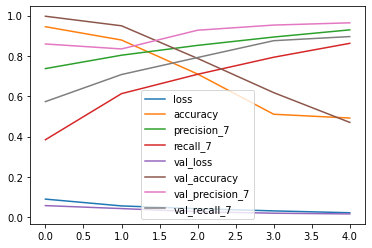

In [280]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [281]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
re = Recall()

for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true, y_true = batch
    #Make prediction
    yhat = mult_model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)

1/1 [==============================] - 0s 35ms/step


In [283]:
acc = mult_model.evaluate(test, verbose=0)

In [286]:
avg_acc = sum(acc)/len(acc)

In [287]:
print('Test Accuracy: %f' % (avg_acc*100))

Test Accuracy: 58.975709


In [282]:
f1_score = 2*(pre.result().numpy() * re.result().numpy())/(pre.result().numpy() + re.result().numpy())
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, F1-score:{f1_score}')

Precision: 0.9692221879959106, Recall:0.9101418852806091, F1-score:0.9387534531648345


In [288]:
from sklearn.metrics import accuracy_score
ci_length = z_value * np.sqrt((avg_acc * (1 - avg_acc)) / y.shape[0])
ci_lower = acc - ci_length
ci_upper = acc + ci_length
print("Lower bound: ", ci_lower, "Upper bound: ", ci_upper)
print()
print("So, the above values represent the 95% confidence interval around the test set accuracy")

Lower bound:  [0.00919796 0.45984053 0.9614104  0.91000283] Upper bound:  [0.01848628 0.46912885 0.97069872 0.91929114]

So, the above values represent the 95% confidence interval around the test set accuracy


## Multilingual CNN with lower batch size

In [298]:
#MCSHBAP - map, cache, shuffle, batch, prefetch
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(40_000)
dataset = dataset.batch(20) 
dataset = dataset.prefetch(8) #help prevents bottlenecks 

In [299]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [300]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.1))
test = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.2))

In [302]:
max_features = MAX_FEATURES
max_comment_length = 1800
embedding_dim = 64


mult_model = Sequential()
mult_model.add(Embedding(input_dim=max_features, 
                    output_dim=embedding_dim, 
                    input_length=max_comment_length))
mult_model.add(Conv1D(filters=embedding_dim*5, 
                 kernel_size=4, 
                 activation='relu'))
mult_model.add(GlobalMaxPooling1D())
mult_model.add(Dense(6, activation = 'sigmoid'))


mult_model.summary()

mult_model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',keras.metrics.Precision(), keras.metrics.Recall()])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 1800, 64)          2560000   
                                                                 
 conv1d_1 (Conv1D)           (None, 1797, 320)         82240     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 320)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_49 (Dense)            (None, 6)                 1926      
                                                                 
Total params: 2,644,166
Trainable params: 2,644,166
Non-trainable params: 0
_________________________________________________________________


In [303]:
%%time
epochs = 3

history = mult_model.fit(train, epochs=epochs, validation_data= val, batch_size=128)

Epoch 1/3
1508/1508 [==============================] - 311s 205ms/step - loss: 0.0931 - accuracy: 0.9543 - precision_9: 0.7519 - recall_9: 0.3658 - val_loss: 0.0634 - val_accuracy: 0.9951 - val_precision_9: 0.8415 - val_recall_9: 0.5569
Epoch 2/3
1508/1508 [==============================] - 301s 199ms/step - loss: 0.0575 - accuracy: 0.9300 - precision_9: 0.8102 - recall_9: 0.6067 - val_loss: 0.0428 - val_accuracy: 0.8560 - val_precision_9: 0.8484 - val_recall_9: 0.7344
Epoch 3/3
1508/1508 [==============================] - 326s 216ms/step - loss: 0.0447 - accuracy: 0.7575 - precision_9: 0.8472 - recall_9: 0.6924 - val_loss: 0.0340 - val_accuracy: 0.5842 - val_precision_9: 0.9389 - val_recall_9: 0.7281
Wall time: 15min 37s


<Figure size 576x360 with 0 Axes>

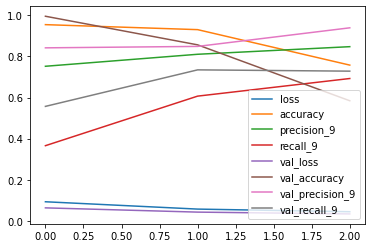

In [304]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [307]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
re = Recall()

for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true, y_true = batch
    #Make prediction
    yhat = mult_model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)

1/1 [==============================] - 0s 37ms/step


In [306]:
acc = mult_model.evaluate(test, verbose=0)

In [308]:
avg_acc = sum(acc)/len(acc)

In [311]:
print('Test Accuracy: %f' % (avg_acc*100))

Test Accuracy: 56.865226


In [312]:
f1_score = 2*(pre.result().numpy() * re.result().numpy())/(pre.result().numpy() + re.result().numpy())
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, F1-score:{f1_score}')

Precision: 0.9399317502975464, Recall:0.7297297120094299, F1-score:0.8215989763343723


In [313]:
from sklearn.metrics import accuracy_score
ci_length = z_value * np.sqrt((avg_acc * (1 - avg_acc)) / y.shape[0])
ci_lower = acc - ci_length
ci_upper = acc + ci_length
print("Lower bound: ", ci_lower, "Upper bound: ", ci_upper)
print()
print("So, the above values represent the 95% confidence interval around the test set accuracy")

Lower bound:  [0.02942076 0.57428345 0.92700896 0.72519132] Upper bound:  [0.03877303 0.58363572 0.93636122 0.73454359]

So, the above values represent the 95% confidence interval around the test set accuracy


## Using padding (without embedding dim) and  hyperparameter tuning for Mult CNN

In [344]:
#Splitting the dataset into comments and features

X = multilingual_ds['comment_text']
y = multilingual_ds[multilingual_ds.columns[3:]].values

In [101]:
from sklearn.model_selection import train_test_split

# assume your dataset is stored in X and y variables
# X is the input data and y is the output (target) data

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34473,)
y_train shape: (34473, 6)
X_test shape: (8619,)
y_test shape: (8619, 6)


In [374]:
X_train = X_train.astype('str')

In [378]:
X_test = X_test.astype('str')

In [380]:
X_train.shape

(34473,)

In [375]:
token_counts = Counter()
for sent in X_train:
    token_counts.update(sent.split(' '))
    
dict_size = len(token_counts.keys())
dict_size

print(token_counts.most_common(50))

[('это', 15249), ('который', 8696), ('статья', 6870), ('сторінка', 6253), ('страница', 5975), ('стаття', 5596), ('мочь', 5064), ('ваш', 4711), ('вікіпедія', 4194), ('википедия', 4139), ('должный', 3719), ('являться', 3641), ('свой', 3341), ('правка', 3222), ('стать', 3196), ('ласка', 3163), ('сделать', 3091), ('человек', 2925), ('зробити', 2913), ('пожалуйста', 2807), ('обсуждение', 2754), ('иметь', 2610), ('просто', 2579), ('редактор', 2424), ('спасибо', 2415), ('обговорення', 2404), ('повинний', 2389), ('время', 2365), ('год', 2346), ('источник', 2343), ('знати', 2339), ('джерело', 2335), ('проблема', 2329), ('хотеть', 2321), ('знать', 2301), ('право', 2283), ('посилання', 2282), ('думати', 2203), ('ссылка', 2184), ('думать', 2134), ('также', 2019), ('хороший', 2011), ('использовать', 1993), ('говорить', 1967), ('робити', 1931), ('користувач', 1849), ('список', 1821), ('вопрос', 1804), ('делать', 1786), ('видалення', 1694)]


In [376]:
# keep tokens with a min occurrence
min_occurane = 2
tokens_occurance = [k for k,c in token_counts.items() if c >= min_occurane]
print(len(tokens_occurance))
min_occurance = len(token_counts.keys())
min_occurance

33946


70198

In [377]:
tokenizer = Tokenizer(num_words=dict_size)
tokenizer.fit_on_texts(X_train)


In [381]:
X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)

In [382]:
max_comment_length = 1500
X_train_padded = pad_sequences(X_train_tokenized, maxlen=max_comment_length)
X_test_padded = pad_sequences(X_test_tokenized, maxlen=max_comment_length)

In [383]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import MaxPooling1D

model_mult = Sequential()
model_mult.add(Embedding(dict_size, 100, input_length=max_comment_length))
model_mult.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model_mult.add(MaxPooling1D(pool_size=2))
model_mult.add(Flatten())
model_mult.add(Dense(10, activation='relu'))
model_mult.add(Dense(6, activation='sigmoid'))
print(model_mult.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 1500, 100)         7019800   
                                                                 
 conv1d_4 (Conv1D)           (None, 1493, 32)          25632     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 746, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 23872)             0         
                                                                 
 dense_52 (Dense)            (None, 10)                238730    
                                                                 
 dense_53 (Dense)            (None, 6)                 66        
                                                     

In [385]:
model_mult.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
# fit network
history = model_mult.fit(X_train_padded, y_train, epochs=5, verbose=2)

Epoch 1/5
1078/1078 - 309s - loss: 0.1432 - accuracy: 0.8837 - precision_15: 0.2196 - recall_15: 0.1384 - 309s/epoch - 287ms/step
Epoch 2/5
1078/1078 - 288s - loss: 0.0676 - accuracy: 0.8208 - precision_15: 0.7808 - recall_15: 0.4668 - 288s/epoch - 267ms/step
Epoch 3/5
1078/1078 - 286s - loss: 0.0500 - accuracy: 0.9195 - precision_15: 0.7941 - recall_15: 0.6767 - 286s/epoch - 265ms/step
Epoch 4/5
1078/1078 - 279s - loss: 0.0412 - accuracy: 0.9306 - precision_15: 0.8251 - recall_15: 0.7289 - 279s/epoch - 259ms/step
Epoch 5/5
1078/1078 - 306s - loss: 0.0364 - accuracy: 0.9310 - precision_15: 0.8519 - recall_15: 0.7540 - 306s/epoch - 284ms/step


<Figure size 576x360 with 0 Axes>

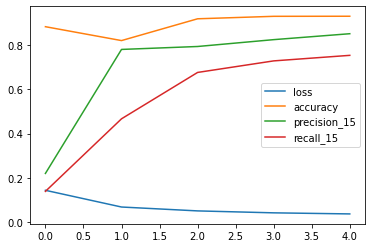

In [386]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [387]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
re = Recall()

for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true, y_true = batch
    #Make prediction
    yhat = mult_model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)

1/1 [==============================] - 0s 47ms/step


In [391]:
f1_score = 2*(pre.result().numpy() * re.result().numpy())/(pre.result().numpy() + re.result().numpy())
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, F1-score:{f1_score}')

Precision: 0.9467496275901794, Recall:0.7216657996177673, F1-score:0.8190248378732213


In [392]:
from sklearn.metrics import accuracy_score
ci_length = z_value * np.sqrt((avg_acc * (1 - avg_acc)) / y.shape[0])
ci_lower = acc - ci_length
ci_upper = acc + ci_length
print("Lower bound: ", ci_lower, "Upper bound: ", ci_upper)
print()
print("So, the above values represent the 95% confidence interval around the test set accuracy")

Lower bound:  [0.0289871  0.56627398 0.93134229 0.73709332] Upper bound:  [0.0383342  0.57562108 0.94068939 0.74644042]

So, the above values represent the 95% confidence interval around the test set accuracy


In [400]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create the model
def create_model(filters, kernel_size, optimizer):
    max_features = dict_size
    embedding_dim = 64
    model = Sequential()
    model.add(Embedding(input_dim=max_features, 
                        output_dim=embedding_dim, 
                        input_length=max_comment_length))
    model.add(Conv1D(filters=filters, 
                     kernel_size=kernel_size, 
                     activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(6, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy',
                           keras.metrics.Precision(), 
                           keras.metrics.Recall()])
    return model

# Create a KerasClassifier based on the create_model function
model = KerasClassifier(build_fn=create_model)

# Define the hyperparameters and their values to search over
param_grid = {
    'filters': [32, 64, 128],
    'kernel_size': [2, 3, 4],
    'optimizer': ['adam', 'sgd']
}

# Create a GridSearchCV object with the model, hyperparameters, and cross-validation settings
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    cv=3, 
                    scoring='accuracy', 
                    n_jobs=-1)

# Fit the grid search object to the training data
grid_result = grid.fit(X_train_padded, y_train)

# Print the best hyperparameters and corresponding score
print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\DVdovenko\AppData\Local\Temp\ipykernel_5472\3462293921.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)
C:\Users\DVdovenko\Desktop\WPy64-39100\python-3.9.10.amd64\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\DVdovenko\Desktop\WPy64-39100\python-3.9.10.amd64\lib\site-packages\sklearn\model_selection\_search.py:984: RuntimeWarning: invalid value encountered in cast
  results["rank_%s" % key_name] = np.asarray(


1078/1078 [==============================] - 149s 137ms/step - loss: 0.1229 - accuracy: 0.9036 - precision_17: 0.6853 - recall_17: 0.2285
Best score: nan using {'filters': 32, 'kernel_size': 2, 'optimizer': 'adam'}


In [401]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: nan using {'filters': 32, 'kernel_size': 2, 'optimizer': 'adam'}
nan (nan) with: {'filters': 32, 'kernel_size': 2, 'optimizer': 'adam'}
nan (nan) with: {'filters': 32, 'kernel_size': 2, 'optimizer': 'sgd'}
nan (nan) with: {'filters': 32, 'kernel_size': 3, 'optimizer': 'adam'}
nan (nan) with: {'filters': 32, 'kernel_size': 3, 'optimizer': 'sgd'}
nan (nan) with: {'filters': 32, 'kernel_size': 4, 'optimizer': 'adam'}
nan (nan) with: {'filters': 32, 'kernel_size': 4, 'optimizer': 'sgd'}
nan (nan) with: {'filters': 64, 'kernel_size': 2, 'optimizer': 'adam'}
nan (nan) with: {'filters': 64, 'kernel_size': 2, 'optimizer': 'sgd'}
nan (nan) with: {'filters': 64, 'kernel_size': 3, 'optimizer': 'adam'}
nan (nan) with: {'filters': 64, 'kernel_size': 3, 'optimizer': 'sgd'}
nan (nan) with: {'filters': 64, 'kernel_size': 4, 'optimizer': 'adam'}
nan (nan) with: {'filters': 64, 'kernel_size': 4, 'optimizer': 'sgd'}
nan (nan) with: {'filters': 128, 'kernel_size': 2, 'optimizer': 'adam'}
nan (nan) w

## Reworked LSTM MODEL ARCHITECTURE

In [434]:
#MCSHBAP - map, cache, shuffle, batch, prefetch
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(40_000)
dataset = dataset.batch(14) #previously 16
dataset = dataset.prefetch(16) #help prevents bottlenecks

In [435]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [436]:
from tensorflow.keras.layers import LSTM, Dropout,Bidirectional,Dense,Embedding,BatchNormalization
#the LSTM commonly uses the Sigmoid activation for recurrent connections and the Tanh activation for output.
initializer = tf.keras.initializers.HeNormal()
mult_model=Sequential()
mult_model.add(Embedding(max_features,32))
mult_model.add(Bidirectional(LSTM(32,activation='tanh')))
mult_model.add(BatchNormalization())
# model.add(Bidirectional(LSTM(64,activation='tanh')))
# model.add(BatchNormalization())
# for some reason adding 2 bidirecitional lstm layer doesnt seem to work it shows an error 
mult_model.add(Dense(128,activation='relu',kernel_initializer=initializer ))
mult_model.add(BatchNormalization())
mult_model.add(Dense(256,activation='relu',kernel_initializer=initializer))
mult_model.add(BatchNormalization())
mult_model.add(Dense(128,activation='relu',kernel_initializer=initializer))
mult_model.add(BatchNormalization())
mult_model.add(Dense(6,activation='sigmoid',kernel_initializer=initializer))

In [437]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

mult_model.compile(
  optimizer=tf.keras.optimizers.Adadelta(learning_rate=lr_schedule),
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=['accuracy'])

In [410]:

history = mult_model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
1885/1885 [==============================] - 3412s 2s/step - loss: 0.3487 - accuracy: 0.4208 - val_loss: 0.1410 - val_accuracy: 0.7707
Epoch 2/5
1885/1885 [==============================] - 3496s 2s/step - loss: 0.1394 - accuracy: 0.8470 - val_loss: 0.1303 - val_accuracy: 0.9143
Epoch 3/5
1885/1885 [==============================] - 3558s 2s/step - loss: 0.1313 - accuracy: 0.9069 - val_loss: 0.1230 - val_accuracy: 0.9233
Epoch 4/5
1885/1885 [==============================] - 3539s 2s/step - loss: 0.1180 - accuracy: 0.9284 - val_loss: 0.1102 - val_accuracy: 0.9576
Epoch 5/5
1885/1885 [==============================] - 3422s 2s/step - loss: 0.1086 - accuracy: 0.9504 - val_loss: 0.1018 - val_accuracy: 0.9683


<Figure size 576x360 with 0 Axes>

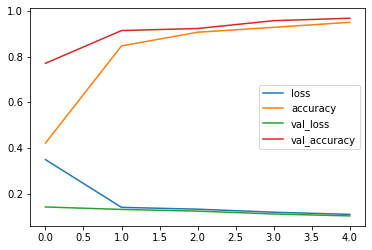

In [411]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [423]:
loss, acc = mult_model.evaluate(test, verbose=0)

In [425]:
print(loss)

0.104801706969738


In [424]:
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 97.235131


In [421]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
re = Recall()

for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true, y_true = batch
    #Make prediction
    yhat = mult_model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)

1/1 [==============================] - 0s 435ms/step


In [422]:
f1_score = 2*(pre.result().numpy() * re.result().numpy())/(pre.result().numpy() + re.result().numpy())
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, F1-score:{f1_score}')

Precision: 0.6850393414497375, Recall:0.27018633484840393, F1-score:0.3875278078885174


In [426]:
from sklearn.metrics import accuracy_score
ci_length = z_value * np.sqrt((acc * (1 - acc)) / y.shape[0])
ci_lower = acc - ci_length
ci_upper = acc + ci_length
print("Lower bound: ", ci_lower, "Upper bound: ", ci_upper)
print()
print("So, the above values represent the 95% confidence interval around the test set accuracy")

Lower bound:  0.9708032140058727 Upper bound:  0.9738994112687855

So, the above values represent the 95% confidence interval around the test set accuracy


## Reworked LSTM more epochs and decreased the batch size

In [438]:
history = mult_model.fit(train, epochs=8, validation_data=val)

Epoch 1/8
2154/2154 [==============================] - 4060s 2s/step - loss: 0.3216 - accuracy: 0.3826 - val_loss: 0.1384 - val_accuracy: 0.7537
Epoch 2/8
2154/2154 [==============================] - 4146s 2s/step - loss: 0.1351 - accuracy: 0.8681 - val_loss: 0.1266 - val_accuracy: 0.9403
Epoch 3/8
2154/2154 [==============================] - 4183s 2s/step - loss: 0.1220 - accuracy: 0.9493 - val_loss: 0.1231 - val_accuracy: 0.9599
Epoch 4/8
2154/2154 [==============================] - 4287s 2s/step - loss: 0.1126 - accuracy: 0.9683 - val_loss: 0.1036 - val_accuracy: 0.9751
Epoch 5/8
2154/2154 [==============================] - 4188s 2s/step - loss: 0.1040 - accuracy: 0.9783 - val_loss: 0.0966 - val_accuracy: 0.9873
Epoch 6/8
2154/2154 [==============================] - 4146s 2s/step - loss: 0.0964 - accuracy: 0.9839 - val_loss: 0.1192 - val_accuracy: 0.9861
Epoch 7/8
2154/2154 [==============================] - 4169s 2s/step - loss: 0.0902 - accuracy: 0.9875 - val_loss: 0.0915 - val_ac

In [439]:
loss, acc = mult_model.evaluate(test, verbose=0)

In [440]:
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 98.859936


<Figure size 576x360 with 0 Axes>

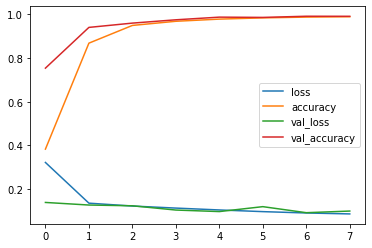

In [444]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [442]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
re = Recall()

for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true, y_true = batch
    #Make prediction
    yhat = mult_model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)

1/1 [==============================] - 0s 489ms/step


In [443]:
f1_score = 2*(pre.result().numpy() * re.result().numpy())/(pre.result().numpy() + re.result().numpy())
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, F1-score:{f1_score}')

Precision: 0.8952381014823914, Recall:0.19852164387702942, F1-score:0.32497837630932863


## CCN using best hyperparameters

In [445]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import MaxPooling1D

model_mult = Sequential()
model_mult.add(Embedding(dict_size, 100, input_length=max_comment_length))
model_mult.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model_mult.add(MaxPooling1D(pool_size=2))
model_mult.add(Flatten())
model_mult.add(Dense(10, activation='relu'))
model_mult.add(Dense(6, activation='sigmoid'))
print(model_mult.summary())

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 1500, 100)         7019800   
                                                                 
 conv1d_6 (Conv1D)           (None, 1499, 32)          6432      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 749, 32)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 23968)             0         
                                                                 
 dense_67 (Dense)            (None, 10)                239690    
                                                                 
 dense_68 (Dense)            (None, 6)                 66        
                                                     

In [446]:
model_mult.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
# fit network
history = model_mult.fit(X_train_padded, y_train, epochs=15, verbose=2)

Epoch 1/15
1078/1078 - 197s - loss: 0.1138 - accuracy: 0.8549 - precision_20: 0.7631 - recall_20: 0.1143 - 197s/epoch - 183ms/step
Epoch 2/15
1078/1078 - 163s - loss: 0.0656 - accuracy: 0.9636 - precision_20: 0.7720 - recall_20: 0.5097 - 163s/epoch - 152ms/step
Epoch 3/15
1078/1078 - 183s - loss: 0.0494 - accuracy: 0.9400 - precision_20: 0.8122 - recall_20: 0.6528 - 183s/epoch - 169ms/step
Epoch 4/15
1078/1078 - 161s - loss: 0.0397 - accuracy: 0.8016 - precision_20: 0.8563 - recall_20: 0.7159 - 161s/epoch - 150ms/step
Epoch 5/15
1078/1078 - 160s - loss: 0.0333 - accuracy: 0.6722 - precision_20: 0.8751 - recall_20: 0.7653 - 160s/epoch - 149ms/step
Epoch 6/15
1078/1078 - 160s - loss: 0.0296 - accuracy: 0.5886 - precision_20: 0.8876 - recall_20: 0.7893 - 160s/epoch - 149ms/step
Epoch 7/15
1078/1078 - 161s - loss: 0.0268 - accuracy: 0.4498 - precision_20: 0.8858 - recall_20: 0.8152 - 161s/epoch - 149ms/step
Epoch 8/15
1078/1078 - 166s - loss: 0.0248 - accuracy: 0.4231 - precision_20: 0.888

<Figure size 576x360 with 0 Axes>

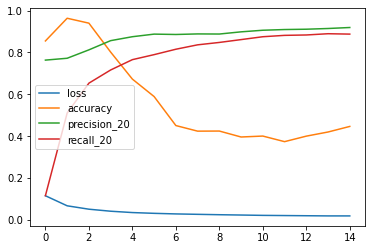

In [447]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [448]:
loss, acc = mult_model.evaluate(test, verbose=0)

In [452]:
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 98.743600


In [449]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
re = Recall()

for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true, y_true = batch
    #Make prediction
    yhat = mult_model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)

1/1 [==============================] - 1s 504ms/step


In [450]:
f1_score = 2*(pre.result().numpy() * re.result().numpy())/(pre.result().numpy() + re.result().numpy())
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, F1-score:{f1_score}')

Precision: 0.8652849793434143, Recall:0.1955503523349762, F1-score:0.31900667967796587


In [451]:
from sklearn.metrics import accuracy_score
ci_length = z_value * np.sqrt((acc * (1 - acc)) / y.shape[0])
ci_lower = acc - ci_length
ci_upper = acc + ci_length
print("Lower bound: ", ci_lower, "Upper bound: ", ci_upper)
print()
print("So, the above values represent the 95% confidence interval around the test set accuracy")

Lower bound:  0.9863843536985215 Upper bound:  0.9884876393663589

So, the above values represent the 95% confidence interval around the test set accuracy


In [428]:
X_train = [str(x) for x in X_train]
X_test = [str(x) for x in X_test]

In [61]:
mult_df = pd.concat([multilingual_ds, pd.DataFrame({'Sentiment': X})], axis=1)

# print the resulting dataset
mult_df.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Sentiment
0,0,426417035bd5b20c,пропонований злиття неформалізм стаття існуват...,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,4264fd1c363935d3,колір фон заповнення колір фон світлосірий вер...,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,4265fd7c2447bc08,жила скеля половина австралійський англійський...,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,4266b67c57e3cfbb,японський назва місто переглянути пост вікіпед...,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,426a0fd1b3460373,небажання обговорювати будьякий змінити свідчи...,1.0,0.0,0.0,0.0,0.0,0.0,5


In [39]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [43]:
X = X.apply(lambda x: sentiment_score(x[:512]))

In [427]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Hyperparameters tuning for BiLSTM

In [109]:
import matplotlib.pyplot as plt
import tensorflow
from collections import Counter
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier


In [107]:
MAX_FEATURES = 40_000

In [83]:
data = pd.read_csv("../../Desktop/notebooks/mult_ds_preprocessed.csv")

In [85]:
#Splitting the dataset into comments and features

X = data['comment_text']
y = data[data.columns[3:]].values

In [88]:
from sklearn.model_selection import train_test_split

# assume your dataset is stored in X and y variables
# X is the input data and y is the output (target) data

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34473,)
y_train shape: (34473, 6)
X_test shape: (8619,)
y_test shape: (8619, 6)


In [95]:
X_train = X_train.astype('str')

In [96]:
X_test = X_test.astype('str')

In [97]:
token_counts = Counter()
for sent in X_train:
    token_counts.update(sent.split(' '))
    
dict_size = len(token_counts.keys())
dict_size

print(token_counts.most_common(50))

[('это', 15249), ('который', 8696), ('статья', 6870), ('сторінка', 6253), ('страница', 5975), ('стаття', 5596), ('мочь', 5064), ('ваш', 4711), ('вікіпедія', 4194), ('википедия', 4139), ('должный', 3719), ('являться', 3641), ('свой', 3341), ('правка', 3222), ('стать', 3196), ('ласка', 3163), ('сделать', 3091), ('человек', 2925), ('зробити', 2913), ('пожалуйста', 2807), ('обсуждение', 2754), ('иметь', 2610), ('просто', 2579), ('редактор', 2424), ('спасибо', 2415), ('обговорення', 2404), ('повинний', 2389), ('время', 2365), ('год', 2346), ('источник', 2343), ('знати', 2339), ('джерело', 2335), ('проблема', 2329), ('хотеть', 2321), ('знать', 2301), ('право', 2283), ('посилання', 2282), ('думати', 2203), ('ссылка', 2184), ('думать', 2134), ('также', 2019), ('хороший', 2011), ('использовать', 1993), ('говорить', 1967), ('робити', 1931), ('користувач', 1849), ('список', 1821), ('вопрос', 1804), ('делать', 1786), ('видалення', 1694)]


In [98]:
# keep tokens with a min occurrence
min_occurane = 2
tokens_occurance = [k for k,c in token_counts.items() if c >= min_occurane]
print(len(tokens_occurance))
min_occurance = len(token_counts.keys())
min_occurance

33946


70198

In [99]:
tokenizer = Tokenizer(num_words=dict_size)
tokenizer.fit_on_texts(X_train)

In [100]:
X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)

In [106]:
max_comment_length = 1800
X_train_padded = pad_sequences(X_train_tokenized, maxlen=max_comment_length)
X_test_padded = pad_sequences(X_test_tokenized, maxlen=max_comment_length)

In [111]:
from tensorflow.keras.optimizers import Adam

In [112]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
params = {
    'lstm_units': [32, 64, 128],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.01, 0.1],
    'lstm_activation': ['sigmoid', 'tanh', 'relu'],
    'fc_activation': ['relu'],
    'batch_size': [16, 32, 64]
}

# Define the model
def create_model(lstm_units=32, dropout_rate=0.2, learning_rate=0.001,
                 lstm_activation='sigmoid', fc_activation='relu', batch_size=16):
    mult_model = Sequential()
    mult_model.add(Embedding(MAX_FEATURES+1, 32))
    mult_model.add(Bidirectional(LSTM(lstm_units, activation=lstm_activation, dropout=dropout_rate)))
    mult_model.add(Dense(128, activation=fc_activation))
    mult_model.add(Dense(256, activation=fc_activation))
    mult_model.add(Dense(128, activation=fc_activation))
    mult_model.add(Dense(6, activation='sigmoid'))

    optimizer = Adam(lr=learning_rate)
    mult_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return mult_model

# Define the grid search object
grid_search = GridSearchCV(estimator=KerasClassifier(build_fn=create_model),
                           param_grid=params, cv=3)

# Fit the grid search object to the training data
grid_result = grid_search.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), verbose=2)

# Print the best hyperparameters and model score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\DVdovenko\AppData\Local\Temp\ipykernel_17500\3316613490.py:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_search = GridSearchCV(estimator=KerasClassifier(build_fn=create_model),


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1459/embedding_1459/embedding_lookup' defined at (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\DVdovenko\AppData\Local\Temp\ipykernel_17500\3316613490.py", line 33, in <module>
      grid_result = grid_search.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), verbose=2)
    File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 926, in fit
      self.best_estimator_.fit(X, y, **fit_params)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
      return super().fit(x, y, **kwargs)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\wrappers\scikit_learn.py", line 175, in fit
      history = self.model.fit(x, y, **fit_args)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_1459/embedding_1459/embedding_lookup'
indices[15,1799] = 64330 is not in [0, 40001)
	 [[{{node sequential_1459/embedding_1459/embedding_lookup}}]] [Op:__inference_train_function_4804855]

## Multinomial Bayes Classifier toxic variable (bag-of-words, tf-idf)

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
import scipy.stats
from sklearn.metrics import accuracy_score

confidence = 0.95  # Change to your desired confidence level
z_value = scipy.stats.norm.ppf((1 + confidence) / 2.0)
print(z_value)



1.959963984540054


In [2]:
data = pd.read_csv("../../Desktop/notebooks/mult_ds_preprocessed.csv")

In [4]:
data_cleaned = data.dropna()

In [5]:
data["toxic"] = data["toxic"].astype(int)

In [6]:
# Select only the "comment_text" and "toxic" columns
selected_columns = ['comment_text', 'toxic']
data = data_cleaned[selected_columns]


In [7]:

# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data['comment_text'], data['toxic'], test_size=0.2, random_state=42, stratify=data['toxic'])

In [11]:
# Create a bag-of-words model using CountVectorizer
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

# Train the multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(train_features, train_labels)

# Evaluate the classifier on the test set
pred_labels = clf.predict(test_features)
accuracy = accuracy_score(test_labels, pred_labels)
precision = precision_score(test_labels, pred_labels)
recall = recall_score(test_labels, pred_labels)
f1 = f1_score(test_labels, pred_labels)

print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))

Accuracy: 0.937
Precision: 0.817
Recall: 0.449
F1 score: 0.579


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TF-IDF model using TfidfVectorizer
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

# Train the multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(train_features, train_labels)

# Evaluate the classifier on the test set
pred_labels = clf.predict(test_features)
accuracy = accuracy_score(test_labels, pred_labels)
precision = precision_score(test_labels, pred_labels)
recall = recall_score(test_labels, pred_labels)
f1 = f1_score(test_labels, pred_labels)

print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))

Accuracy: 0.914
Precision: 1.000
Recall: 0.109
F1 score: 0.196


The performance of different machine learning models can depend on a variety of factors, such as the complexity of the problem, the size and quality of the training data, and the hyperparameters of the model.

In this case, it's possible that the BiLSTM model is better suited to the specific problem of classifying toxic comments compared to the multinomial Naive Bayes classifier. BiLSTMs are a type of neural network that are often used for sequential data such as text, and they are known to be effective at capturing the context and meaning of words.

The BiLSTM model may be better able to capture the complex relationships between the words in the comments and the target variable (toxic or not) compared to the simpler MBC model, which assumes that the features are independent.

The evaluation metrics you provided suggest that the BiLSTM model has a high accuracy and precision but a low recall, which means that the model is good at correctly classifying non-toxic comments (high precision) but is less effective at identifying all the toxic comments (low recall). This could be due to the class imbalance in the dataset, where there are many more non-toxic comments than toxic ones.

Overall, it's important to carefully evaluate and compare the performance of different models on the specific problem at hand, and to consider the trade-offs between different evaluation metrics (such as accuracy, precision, recall, and F1 score) depending on the application.

## Downsampling 'toxic' variable (mbc_bag_of_words, mbc_tf_idf, logical regression)

Downsampling and oversampling are two techniques used in machine learning to address class imbalance problems. Class imbalance occurs when one class of a dataset is significantly underrepresented compared to the other class(es). This can cause problems when building models because the model can become biased towards the majority class and perform poorly on the minority class.

Oversampling involves increasing the number of instances in the minority class by generating new instances or duplicating existing ones. This can be done through techniques such as SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic instances by interpolating between instances of the minority class. Oversampling can improve the performance of a model on the minority class, but it can also lead to overfitting if not done properly.

Downsampling involves reducing the number of instances in the majority class to balance the dataset. This can be done by randomly removing instances from the majority class. Downsampling can be effective in reducing the bias towards the majority class, but it can also lead to loss of important information and reduce the overall performance of the model.

Both techniques have their advantages and disadvantages, and the choice between them depends on the specific problem and dataset. It's also worth noting that there are other techniques that can be used to address class imbalance, such as cost-sensitive learning, ensemble methods, and anomaly detection.

In [17]:
# Separate toxic and non-toxic comments
toxic = data[data["toxic"] == 1]
non_toxic = data[data["toxic"] == 0]

# Count the number of toxic and non-toxic comments
n_toxic = len(toxic)
n_non_toxic = len(non_toxic)



In [18]:
print(n_toxic)

4133


In [19]:
print(n_non_toxic)

38748


In [20]:
# Determine which class is the majority class
majority_class = 0 if n_non_toxic > n_toxic else 1

# Randomly select a subset of the majority class to match the size of the minority class
if majority_class == 0:
    non_toxic = non_toxic.sample(n=n_toxic, random_state=42)
else:
    toxic = toxic.sample(n=n_non_toxic, random_state=42)

# Combine the balanced toxic and non-toxic data into a new dataframe or array
balanced_df = pd.concat([toxic, non_toxic])

In [22]:
balanced_df.shape

(8266, 2)

In [23]:
# Count the number of toxic and non-toxic comments
toxic = balanced_df[balanced_df["toxic"] == 1]
non_toxic = balanced_df[balanced_df["toxic"] == 0]

n_toxic = len(toxic)
n_non_toxic = len(non_toxic)


In [24]:
print(n_toxic)

4133


In [25]:
print(n_non_toxic)

4133


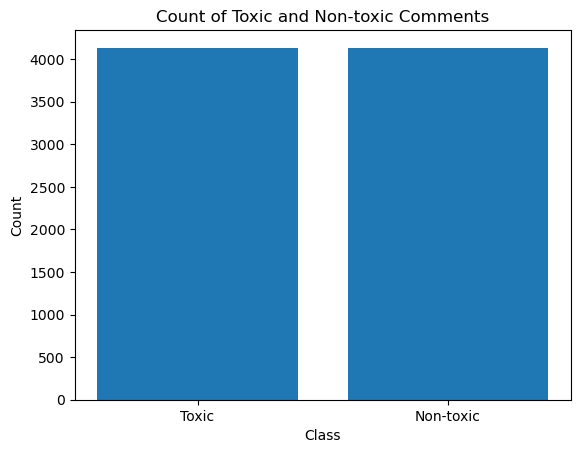

In [1]:
import matplotlib.pyplot as plt


n_toxic = 4133
n_non_toxic = 4133

# Create a bar plot
plt.bar(["Toxic", "Non-toxic"], [n_toxic, n_non_toxic])
plt.title("Count of Toxic and Non-toxic Comments")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## MBC - bag of words

In [59]:
# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    balanced_df['comment_text'], balanced_df['toxic'], test_size=0.2, random_state=42)

In [60]:
##BAG OF WORDS

# Create a bag-of-words model using CountVectorizer
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

# Train the multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(train_features, train_labels)

# Evaluate the classifier on the test set
pred_labels = clf.predict(test_features)
accuracy = accuracy_score(test_labels, pred_labels)
precision = precision_score(test_labels, pred_labels)
recall = recall_score(test_labels, pred_labels)
f1 = f1_score(test_labels, pred_labels)

print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))

Accuracy: 0.842
Precision: 0.872
Recall: 0.796
F1 score: 0.832


In [61]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels, y_pred))

cnf_matrix = confusion_matrix(test_labels, y_pred)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       841
           1       0.86      0.81      0.83       813

    accuracy                           0.84      1654
   macro avg       0.84      0.84      0.84      1654
weighted avg       0.84      0.84      0.84      1654



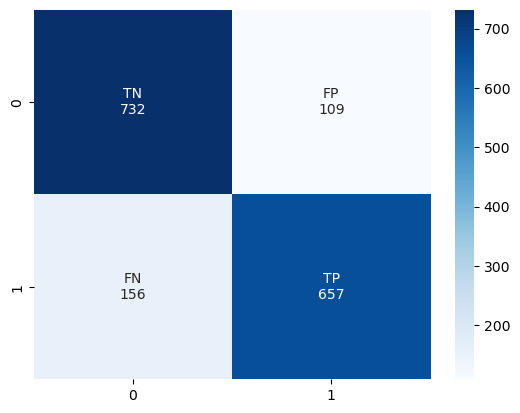

In [62]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

In [63]:
import numpy as np

from sklearn.metrics import accuracy_score
ci_length = z_value * np.sqrt((accuracy * (1 - accuracy)) / test_labels.shape[0])
ci_lower = accuracy - ci_length
ci_upper = accuracy + ci_length
print("Lower bound: ", ci_lower, "Upper bound: ", ci_upper)
print()
print("So, the above values represent the 95% confidence interval around the test set accuracy")

Lower bound:  0.8246319843277209 Upper bound:  0.8597694667000905

So, the above values represent the 95% confidence interval around the test set accuracy


## MBC -  tf-idf

In [64]:
##TF IDF

from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TF-IDF model using TfidfVectorizer
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

# Train the multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(train_features, train_labels)

# Evaluate the classifier on the test set
pred_labels = clf.predict(test_features)
accuracy = accuracy_score(test_labels, pred_labels)
precision = precision_score(test_labels, pred_labels)
recall = recall_score(test_labels, pred_labels)
f1 = f1_score(test_labels, pred_labels)

print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))

Accuracy: 0.845
Precision: 0.880
Recall: 0.793
F1 score: 0.834


In [65]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels, y_pred))

cnf_matrix = confusion_matrix(test_labels, y_pred)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       841
           1       0.86      0.81      0.83       813

    accuracy                           0.84      1654
   macro avg       0.84      0.84      0.84      1654
weighted avg       0.84      0.84      0.84      1654



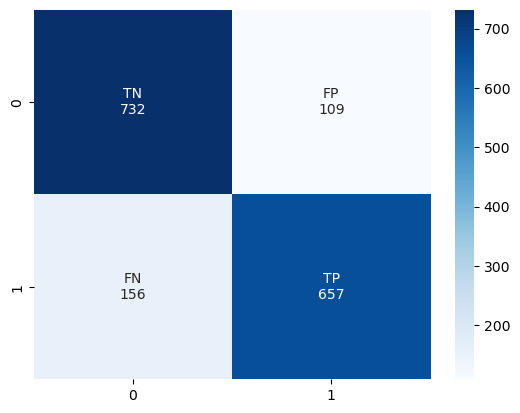

In [66]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

In [49]:
import numpy as np

from sklearn.metrics import accuracy_score
ci_length = z_value * np.sqrt((accuracy * (1 - accuracy)) / test_labels.shape[0])
ci_lower = accuracy - ci_length
ci_upper = accuracy + ci_length
print("Lower bound: ", ci_lower, "Upper bound: ", ci_upper)
print()
print("So, the above values represent the 95% confidence interval around the test set accuracy")

Lower bound:  0.8277928567055112 Upper bound:  0.8626545435363268

So, the above values represent the 95% confidence interval around the test set accuracy


The downsampling has improved the performance of your model! A balanced dataset can help the classifier to learn from both the classes equally, and can lead to better generalization on unseen data.

An accuracy of 0.845, precision of 0.880, recall of 0.793, and F1 score of 0.834 are decent metrics for a binary classification problem. It seems that your model is able to classify toxic comments with a reasonable level of accuracy while also having a good balance between precision and recall.

However, it's important to note that the choice of evaluation metrics can depend on the specific problem you're trying to solve. For example, if you're dealing with a sensitive task such as detecting hate speech or cyberbullying, you might prioritize recall over precision to make sure that you don't miss any harmful comments. Conversely, if you're trying to filter out spam or low-quality comments, you might prioritize precision to avoid flagging too many false positives.

## Logical regression tf-idf

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

# Define the model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(train_features, train_labels)

# Make predictions on the test set
y_pred = lr_model.predict(test_features)

# Evaluate the model using accuracy, precision, recall, and F1 score
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))

Accuracy: 0.840
Precision: 0.858
Recall: 0.808
F1 score: 0.832


In [45]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels, y_pred))

cnf_matrix = confusion_matrix(test_labels, y_pred)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       841
           1       0.86      0.81      0.83       813

    accuracy                           0.84      1654
   macro avg       0.84      0.84      0.84      1654
weighted avg       0.84      0.84      0.84      1654



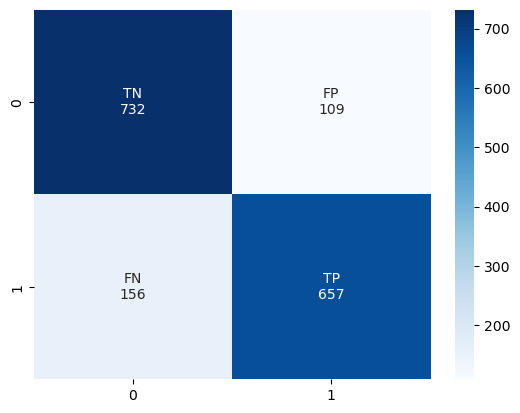

In [47]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

In [36]:
import numpy as np

from sklearn.metrics import accuracy_score
ci_length = z_value * np.sqrt((accuracy * (1 - accuracy)) / test_labels.shape[0])
ci_lower = accuracy - ci_length
ci_upper = accuracy + ci_length
print("Lower bound: ", ci_lower, "Upper bound: ", ci_upper)
print()
print("So, the above values represent the 95% confidence interval around the test set accuracy")

Lower bound:  0.8221049253181834 Upper bound:  0.8574597663384067

So, the above values represent the 95% confidence interval around the test set accuracy


## Hyperparameters tuning MBC

In [68]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_data)
test_features = vectorizer.transform(test_data)

# Define the model
nb_model = MultinomialNB()

# Define the hyperparameters and their values to search
hyperparameters = {'alpha': [0.01, 0.1, 1.0, 10.0]}

# Perform grid search using cross-validation
clf = GridSearchCV(nb_model, hyperparameters, cv=5)

# Train the model on the training data
clf.fit(train_features, train_labels)

# Make predictions on the test data
y_pred = clf.predict(test_features)

# Evaluate the model using accuracy, precision, recall, and F1 score
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best hyperparameters: ", clf.best_params_)
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 score: {:.3f}".format(f1))

Best hyperparameters:  {'alpha': 1.0}
Accuracy: 0.845
Precision: 0.880
Recall: 0.793
F1 score: 0.834


In [74]:

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(train_labels), ]
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(train_features, train_labels)

print('Best Accuracy Through Grid Search : {:.3f}'.format(multinomial_nb_grid.best_score_))
print('Best Parameters : {}\n'.format(multinomial_nb_grid.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.855
Best Parameters : {'alpha': 1.0, 'class_prior': None, 'fit_prior': False}



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 693, in fit
    self._update_class_log_prior(class_prior=class_prior)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 529, in _update_class_log_prior
    raise ValueError("Number of priors must m

In [77]:
y_pred = multinomial_nb_grid.predict(test_features)
print(classification_report(test_labels,y_pred))

cnf_matrix = confusion_matrix(test_labels,y_pred)



              precision    recall  f1-score   support

           0       0.81      0.90      0.85       841
           1       0.88      0.79      0.83       813

    accuracy                           0.84      1654
   macro avg       0.85      0.84      0.84      1654
weighted avg       0.85      0.84      0.84      1654



In this example, we define a MultinomialNB model and specify a range of values for the alpha hyperparameter. We then use GridSearchCV to perform a grid search over the hyperparameter values, using 5-fold cross-validation. The best hyperparameters are determined based on the cross-validation performance, and the resulting model is trained on the full training set with the best hyperparameters. Finally, we evaluate the model on the test set and report the evaluation metrics.

You can adjust the hyperparameters to search over, as well as the cross-validation settings, to fine-tune the performance of your model. It's also a good idea to try different types of Bayesian classifiers, such as Gaussian or Bernoulli Naive Bayes, depending on the nature of your data.

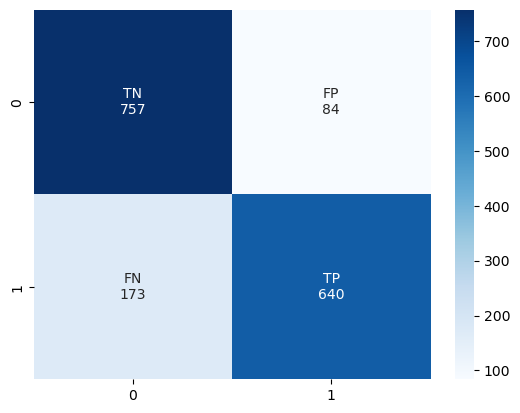

In [78]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

## Hyperparameter tuning for Logical Regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search over
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.01, 0.1, 1.0, 10.0],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Create the logistic regression model
lr = LogisticRegression(max_iter=1000)

# Create the GridSearchCV object with 5-fold cross-validation
clf = GridSearchCV(lr, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
clf.fit(train_features, train_labels)

# Print the best hyperparameters and their corresponding score
print("Best parameters:", clf.best_params_)
print("Best score:", clf.best_score_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

Best parameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'saga'}
Best score: 0.847398465185368


In this example, we define a grid of hyperparameters to search over using the param_grid dictionary. We create a LogisticRegression model with a maximum of 1000 iterations and use GridSearchCV to search over the hyperparameters in param_grid with 5-fold cross-validation. We then fit the GridSearchCV object to the training data X_train and y_train. Finally, we print the best hyperparameters and their corresponding score.

Note that this example assumes that you have already split your data into training and testing sets X_train, y_train, X_test, y_test. You can also use GridSearchCV with other types of cross-validation, such as StratifiedKFold or TimeSeriesSplit, depending on the nature of your data.